[[1.00000000e+00 6.12163397e-01 3.74744024e-01]
 [1.00000000e+00 5.10345947e-01 2.60452985e-01]
 [1.00000000e+00 1.18399348e-01 1.40184056e-02]
 [1.00000000e+00 6.77444536e-01 4.58931100e-01]
 [1.00000000e+00 5.27899376e-01 2.78677751e-01]
 [1.00000000e+00 2.35551038e-01 5.54842917e-02]
 [1.00000000e+00 5.76543426e-01 3.32402322e-01]
 [1.00000000e+00 6.53739925e-01 4.27375889e-01]
 [1.00000000e+00 7.08583827e-02 5.02091040e-03]
 [1.00000000e+00 2.23794221e-01 5.00838536e-02]
 [1.00000000e+00 9.76547957e-01 9.53645911e-01]
 [1.00000000e+00 2.07160362e-01 4.29154156e-02]
 [1.00000000e+00 6.46214247e-01 4.17592853e-01]
 [1.00000000e+00 5.11771922e-01 2.61910500e-01]
 [1.00000000e+00 4.74481656e-01 2.25132842e-01]
 [1.00000000e+00 3.28538289e-01 1.07937408e-01]
 [1.00000000e+00 4.08256865e-01 1.66673668e-01]
 [1.00000000e+00 6.32591506e-02 4.00172014e-03]
 [1.00000000e+00 6.53063040e-01 4.26491334e-01]
 [1.00000000e+00 3.24991768e-03 1.05619649e-05]
 [1.00000000e+00 1.77055071e-01 3.134849

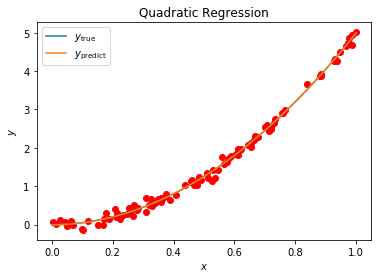

In [5]:
#Exercise 3), 1.

import numpy as np
import matplotlib.pyplot as plt

n = 100 # data points
xmax = 1
error = 0.1

# The following simple Python instructions define our x and y values (with 100 data points)
x = np.random.rand(n,xmax)
y = 5*x*x+error*np.random.randn(n,xmax) # y = 5x^2 + noise

#for xi, yi in zip(x, y):
#    print(xi, yi)

X = np.c_[np.ones((n,1)), x, x*x] # column wise array concatenation
print(X)

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("y = " + str(beta[2,0]) + "*x^2 + " + str(beta[1,0]) + "*x + " + str(beta[0,0]))

nfit = 100
xplot = np.arange(nfit)*xmax / (nfit - 1) # nfit points, evenly distributed
#print(xplot)
#print(xplot**2)

Xplot = np.c_[np.ones((nfit,1)), xplot, xplot**2] # concatenate columns (as above)

ypredict = Xplot.dot(beta)

ytrue = 5*xplot*xplot

plt.plot(x, y ,'ro')
plt.plot(xplot, ytrue, label="$y_{\mathrm{true}}$")
plt.plot(xplot, ypredict, label="$y_{\mathrm{predict}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Quadratic Regression')
plt.legend()
plt.show()



ypredict = 4.952427153250725*x^2 + 0.04773719737993316*x + 0.0
ysklearn = 4.952427153250791*x^2 + 0.04773719737983839*x + -0.007793182950985356


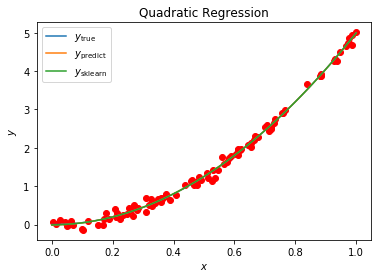

C:\Users\Mau\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Mau\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


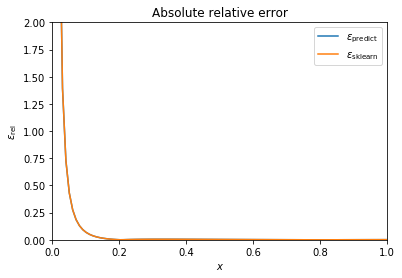

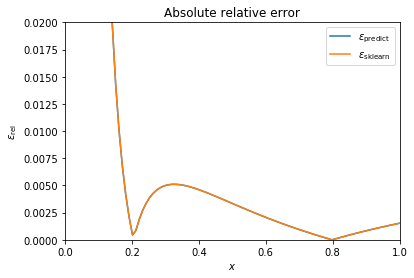

In [6]:
#Exercise 3), 2.

from sklearn.linear_model import LinearRegression

clf2 = LinearRegression()
clf2.fit(X, y)
ysklearn = clf2.predict(Xplot)

print("ypredict = " + str(clf2.coef_[0, 2]) + "*x^2 + " + str(clf2.coef_[0, 1]) + "*x + " + str(clf2.coef_[0, 0]))
print("ysklearn = " + str(beta[2,0]) + "*x^2 + " + str(beta[1,0]) + "*x + " + str(beta[0,0]))
# note that the indices are reversed in the scikit-learn approach compared to what we did before:
# the shape is (1, n) instead of (n, 1)

plt.plot(x, y ,'ro')
plt.plot(xplot, ytrue, label="$y_{\mathrm{true}}$")
plt.plot(xplot, ypredict, label="$y_{\mathrm{predict}}$")
plt.plot(xplot, ysklearn, label="$y_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Quadratic Regression')
plt.legend()
plt.show()

err_predict = abs(ypredict[:, 0] - ytrue)/abs(ytrue) # the predicted y's have shape (n, 1)
err_sklearn = abs(ysklearn[:, 0] - ytrue)/abs(ytrue)

plt.plot(xplot, err_predict, label="$\epsilon_{\mathrm{predict}}$")
plt.plot(xplot, err_sklearn, label="$\epsilon_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{rel}}$')
plt.axis([0, xmax, 0, 2])
plt.title(r'Absolute relative error')
plt.legend()
plt.show()

plt.plot(xplot, abs(err_predict), label="$\epsilon_{\mathrm{predict}}$")
plt.plot(xplot, abs(err_sklearn), label="$\epsilon_{\mathrm{sklearn}}$")
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{rel}}$')
plt.axis([0, xmax, 0, 0.02])
plt.title(r'Absolute relative error')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

# Note that the y values are not sorted, but ypredict and ysklearn are
# (we used Xplot to find these, not X)
# Thus, done with plotting, let us instead make new predictions based on X

ypredict2 = X.dot(beta)
ysklearn2 = clf2.predict(X)

# Then we find the MSE:

print("Mean squared error (ypredict):", mean_squared_error(y, ypredict2))
print("Mean squared error (ysklearn):", mean_squared_error(y, ysklearn2))

Mean squared error (ypredict): 0.008008011556814134
Mean squared error (ysklearn): 0.008008011556814127


In [8]:
from sklearn.metrics import r2_score

print("R^2 score (ypredict):", r2_score(y, ypredict2))
print("R^2 score (ysklearn):", r2_score(y, ysklearn2))

R^2 score (ypredict): 0.996242283300533
R^2 score (ysklearn): 0.996242283300533


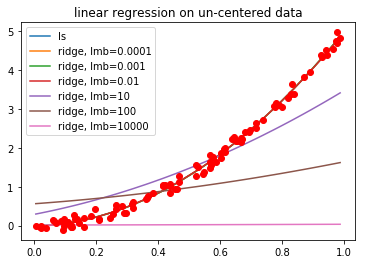

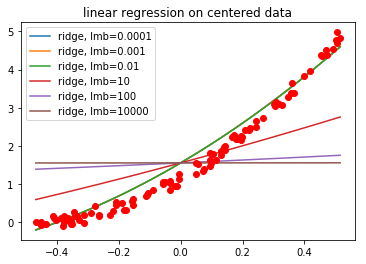

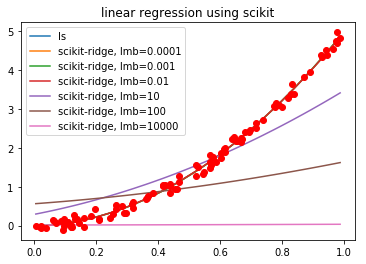

lambda = 0.0001
r2 for scikit: 0.995309
r2 for own code, not centered: 0.995309
r2 for own, centered: 0.960099

lambda = 0.001
r2 for scikit: 0.995309
r2 for own code, not centered: 0.995309
r2 for own, centered: 0.960099

lambda = 0.01
r2 for scikit: 0.995292
r2 for own code, not centered: 0.995292
r2 for own, centered: 0.960096

lambda = 10
r2 for scikit: 0.85147
r2 for own code, not centered: 0.85147
r2 for own, centered: 0.660925

lambda = 100
r2 for scikit: 0.22452
r2 for own code, not centered: 0.22452
r2 for own, centered: 0.138506

lambda = 10000
r2 for scikit: -1.11883
r2 for own code, not centered: -1.11883
r2 for own, centered: 0.00155748



In [14]:
# Exercise 5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

np.random.seed(0)

n_samples = 100
error = 0.1

x = np.random.rand(n_samples,1)
y = 5*x*x + error*np.random.randn(n_samples,1)

# Centering  x and y.
x_ = x - np.mean(x)
y_ = y - np.mean(y) # beta_0 = mean(y)

X = np.c_[np.ones((n_samples,1)), x, x**2]
X_ = np.c_[x_, x_**2]


### 1.
lmb_values = [1e-4, 1e-3, 1e-2, 10, 1e2, 1e4]
num_values = len(lmb_values)

## Ridge-regression of centered and not centered data
beta_ridge = np.zeros((3,num_values))
beta_ridge_centered = np.zeros((3,num_values))

I3 = np.eye(3)
I2 = np.eye(2)

for i,lmb in enumerate(lmb_values):
    beta_ridge[:,i] = (np.linalg.inv( X.T @ X + lmb*I3) @ X.T @ y).flatten()
    beta_ridge_centered[1:,i] = (np.linalg.inv( X_.T @ X_ + lmb*I2) @ X_.T @ y_).flatten()

# sett beta_0 = np.mean(y)
beta_ridge_centered[0,:] = np.mean(y)

## OLS (ordinary least squares) solution 
beta_ls = np.linalg.inv( X.T @ X ) @ X.T @ y

## Evaluate the models
pred_ls = X @ beta_ls
pred_ridge =  X @ beta_ridge
pred_ridge_centered =  X_ @ beta_ridge_centered[1:] + beta_ridge_centered[0,:]

## Plot the results

# Sorting
sort_ind = np.argsort(x[:,0])

x_plot = x[sort_ind,0]
x_centered_plot = x_[sort_ind,0]

pred_ls_plot = pred_ls[sort_ind,0]
pred_ridge_plot = pred_ridge[sort_ind,:]
pred_ridge_centered_plot = pred_ridge_centered[sort_ind,:]

# Plott not centered
plt.plot(x_plot,pred_ls_plot,label='ls')

for i in range(num_values):
    plt.plot(x_plot,pred_ridge_plot[:,i],label='ridge, lmb=%g'%lmb_values[i])

plt.plot(x,y,'ro')

plt.title('linear regression on un-centered data')
plt.legend()

# Plott centered
plt.figure()

for i in range(num_values):
    plt.plot(x_centered_plot,pred_ridge_centered_plot[:,i],label='ridge, lmb=%g'%lmb_values[i])

plt.plot(x_,y,'ro')

plt.title('linear regression on centered data')
plt.legend()


# 2.

pred_ridge_scikit =  np.zeros((n_samples,num_values))
for i,lmb in enumerate(lmb_values):
    pred_ridge_scikit[:,i] = (Ridge(alpha=lmb,fit_intercept=False).fit(X,y).predict(X)).flatten() # fit_intercept=False fordi bias er allerede i X

plt.figure()

plt.plot(x_plot,pred_ls_plot,label='ls')

for i in range(num_values):
    plt.plot(x_plot,pred_ridge_scikit[sort_ind,i],label='scikit-ridge, lmb=%g'%lmb_values[i])

plt.plot(x,y,'ro')
plt.legend()
plt.title('linear regression using scikit')

plt.show()

### R2-score of the results
for i in range(num_values):
    print('lambda = %g'%lmb_values[i])
    print('r2 for scikit: %g'%r2_score(y,pred_ridge_scikit[:,i]))
    print('r2 for own code, not centered: %g'%r2_score(y,pred_ridge[:,i]))
    print('r2 for own, centered: %g\n'%r2_score(y,pred_ridge_centered[:,i]))